# CLASE 4.1 - NUMERICAL

## Lesson 1

In [708]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)


In [709]:
#importing data
data = pd.read_csv('data_4.01_activities/files_for_activities/unit4.csv') # this file is in files_for_lesson_and_activities folder
data.head()


,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [710]:
data.shape

(90569, 28)

In [711]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90569 entries, 0 to 90568
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     90569 non-null  object 
 1   PVASTATE  90569 non-null  object 
 2   DOB       90569 non-null  int64  
 3   MDMAUD    90569 non-null  object 
 4   RECP3     90569 non-null  object 
 5   GENDER    90569 non-null  object 
 6   DOMAIN    90569 non-null  object 
 7   INCOME    70386 non-null  float64
 8   HOMEOWNR  90569 non-null  object 
 9   HV1       90569 non-null  int64  
 10  HV2       90569 non-null  int64  
 11  HV3       90569 non-null  int64  
 12  HV4       90569 non-null  int64  
 13  IC1       90569 non-null  int64  
 14  IC2       90569 non-null  int64  
 15  IC3       90569 non-null  int64  
 16  IC4       90569 non-null  int64  
 17  IC5       90569 non-null  int64  
 18  VETERANS  90569 non-null  object 
 19  NUMPROM   90569 non-null  int64  
 20  CARDPROM  90569 non-null  in

In [712]:
# Checking for null values
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls = nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
7,INCOME,0.222847
26,TIMELAG,0.106582
0,STATE,0.000000
15,IC3,0.000000
25,NGIFTALL,0.000000
24,RFA_2,0.000000
23,MAXADATE,0.000000
22,NUMPRM12,0.000000
21,CARDPM12,0.000000
20,CARDPROM,0.000000


In [713]:
# Check the numerical variables
numericals = data.select_dtypes(np.number)
numericals.head()

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865


In [714]:
data.HOMEOWNR.value_counts()

H    49646
     21051
U    19872
Name: HOMEOWNR, dtype: int64

The INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.
In this exercise, we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.
We will use a similar method for the column TIMELAG .

<Axes: >

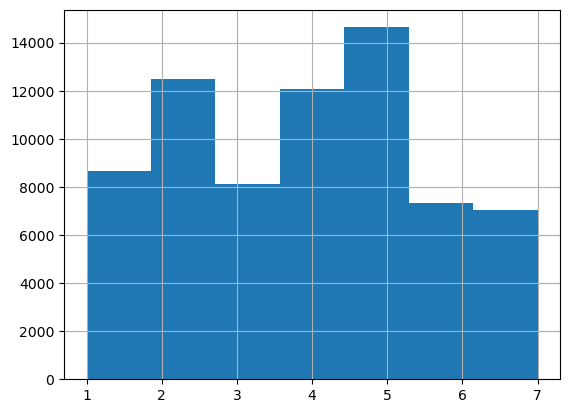

In [715]:
# working with INCOME column EDA + Data cleaning
data['INCOME'].hist(bins=7)


Looking at the histogram, we can see we need to replace the missing values first.
In the previous lessons, we talked about replacing null values with mean and median and some other constant value. In the later lessons, we will look at methods different than filling with constants (mean and median).

## Lesson 2

<Axes: >

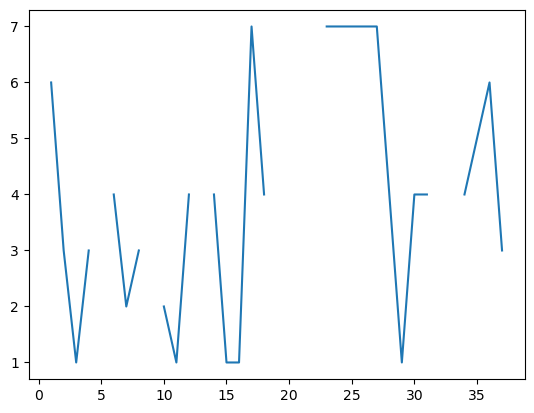

In [716]:
# How interpolation works
data['INCOME'][0:40].plot()  # To check how interpolation would fill the missing values

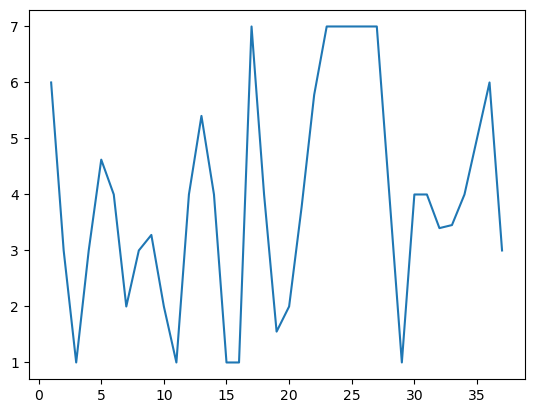

In [717]:
#new_income_data = data['INCOME'][0:40].interpolate(method='linear')
#new_income_data = data['INCOME'][0:40].interpolate(method='akima')  # Other methods that can be used
new_income_data = data['INCOME'][0:40].interpolate(method='polynomial', order=3)  # Other methods that can be used
new_income_data.plot()
plt.show()

<Axes: xlabel='INCOME', ylabel='Density'>

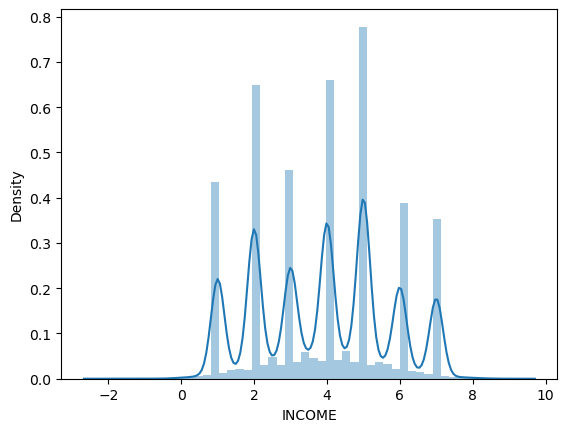

In [718]:
# Test what does the distribution look like after we have used interpolation method
points = data['INCOME'].interpolate(method='akima')
sns.distplot(points[1:])   # We are using the index __1:__ as first value was NaN

It is important to compare the results with other methods and then choose the best one.

<Axes: xlabel='INCOME', ylabel='Density'>

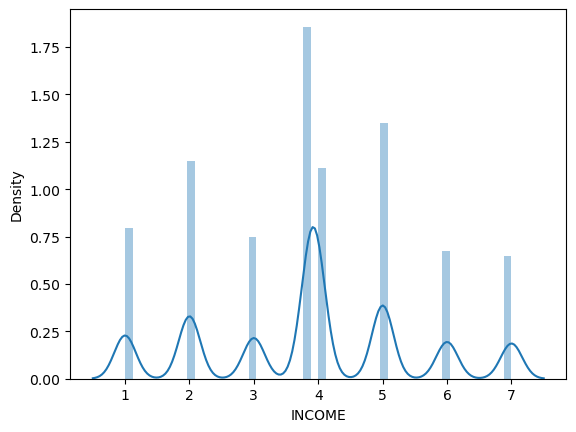

In [719]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.distplot(points2)

<Axes: xlabel='INCOME', ylabel='Density'>

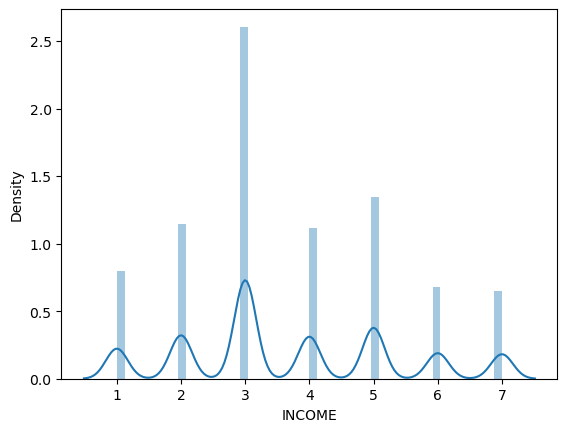

In [720]:
# Note that unlike "np.mean()" , "np.median()" doesn't work if there are any null values in the column
median = np.median(data['INCOME'].fillna(0))

points3 = data['INCOME'].fillna(median)
sns.distplot(points3)


In [721]:
# Finally choosing mean method
data['INCOME'] = data['INCOME'].fillna(np.mean(data['INCOME']))

## Lesson 3

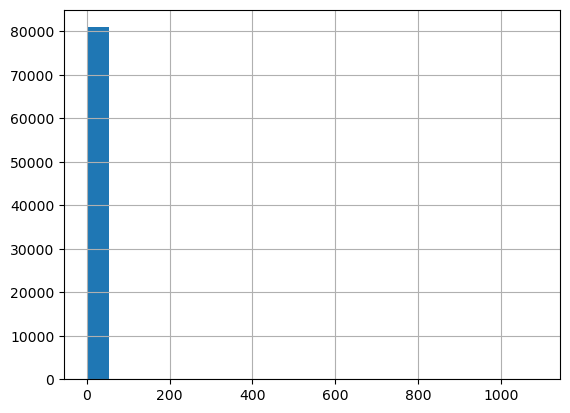

In [722]:
# Working with INCOME column EDA + Data cleaning
data['TIMELAG'].hist(bins=20)
plt.show()

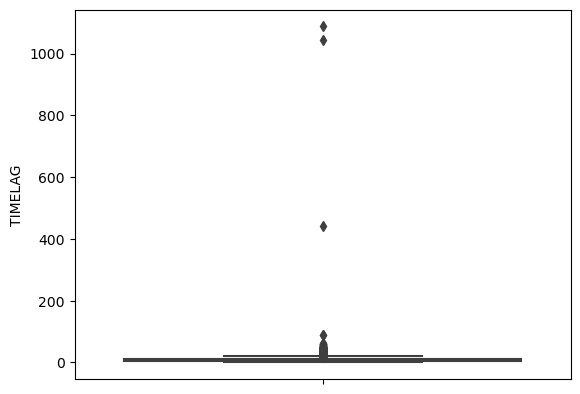

In [723]:
sns.boxplot(y=data['TIMELAG'])
plt.show()

Data in the Timelag column is highly skewed (positive skewness).
Removing outliers straight away might not be the best idea as it would remove a lot of data points from the data.
We will try some transformations.


In [724]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [725]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


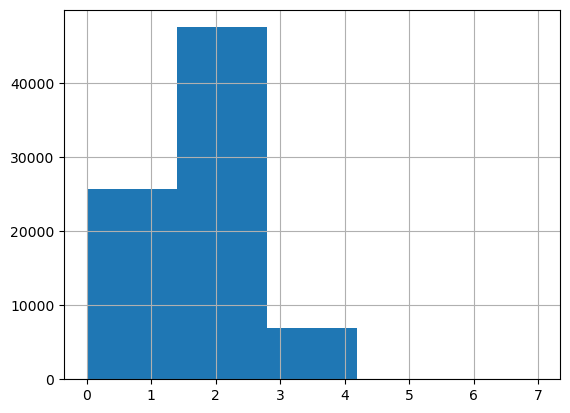

In [726]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist(bins=5)
plt.show()

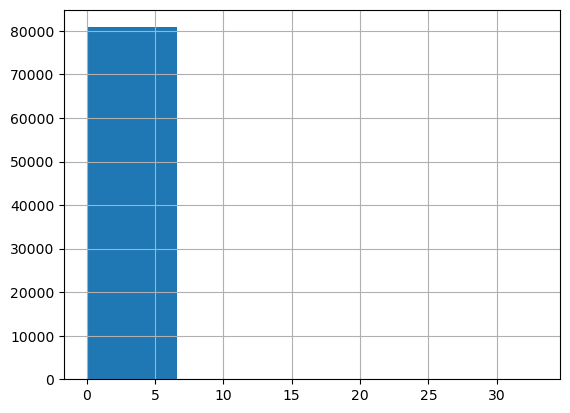

In [727]:
pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist(bins=5)
plt.show()


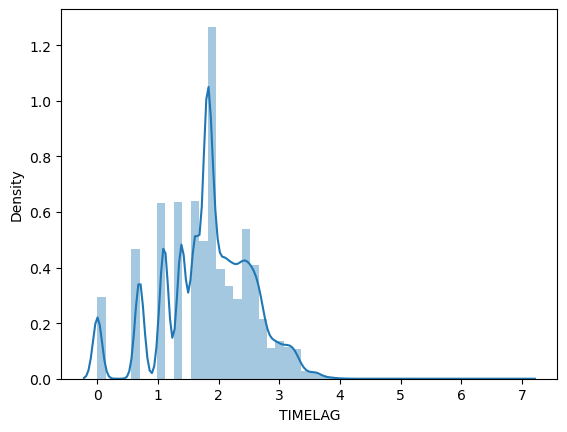

In [728]:
# Use log transformation to replace the values of the column now
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

## Lesson 4
Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.


In [729]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print(upper_limit)

3.677021190805279


In [730]:
new_df = data[data['TIMELAG'] > upper_limit]
len(new_df)  # THis checks the number of points that will be removed

146

In [731]:
# Using filters
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

90423

In [732]:
## some other simple applications of filter

lst = [0,1,2,3,4,5,6,7,8,9,10]
list(filter(lambda x: x % 2 == 0, lst))


[0, 2, 4, 6, 8, 10]

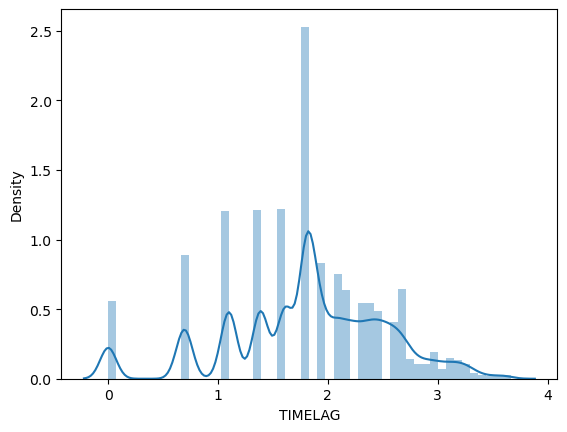

In [733]:
# Removing outliers
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()

# CLASE 4.2 - CATEGORICAL

## LESSON 1
Note this is a way to check the categorical variables (dtypes as object). If we want to perform any filtering operation, we will take the complete dataset and not just the categorical columns.

In [734]:
categoricals = data.select_dtypes(object)
categoricals.head()

,STATE,PVASTATE,MDMAUD,RECP3,GENDER,DOMAIN,HOMEOWNR,VETERANS,RFA_2
0,IL,,XXXX,,F,T2,,,L4E
1,CA,,XXXX,,M,S1,H,,L2G
2,NC,,XXXX,,M,R2,U,,L4E
3,CA,,XXXX,,F,R2,U,,L4E
4,FL,,XXXX,X,F,S2,H,,L2F


In [735]:
# Deleting columns with over 80% empty values

data['PVASTATE'].value_counts()

     89041
P     1377
E        5
Name: PVASTATE, dtype: int64

In [736]:
data['RECP3'].value_counts()

     88594
X     1829
Name: RECP3, dtype: int64

In [737]:
data['VETERANS'].value_counts()

     80596
Y     9827
Name: VETERANS, dtype: int64

In [738]:
data = data.drop(columns=['PVASTATE', 'RECP3', 'VETERANS'], axis=1)

In [739]:
data['HOMEOWNR'].value_counts()

H    49563
     21021
U    19839
Name: HOMEOWNR, dtype: int64

As you can see, there is a lot of null values in the column but it is still not as many that the column might be removed. And if we filter out those values we will lose a lot of data. Another way of replacing those empty values is by replacing them with the maximum represented category but this introduces a bias. Another advanced methods include using machine learning to predict those values. Here in this case we will delete this column instead of inducing a bias.

In [740]:
data = data.drop(columns=['HOMEOWNR'], axis=1)

In [741]:
categoricals = data.select_dtypes(object)
categoricals.head()

,STATE,MDMAUD,GENDER,DOMAIN,RFA_2
0,IL,XXXX,F,T2,L4E
1,CA,XXXX,M,S1,L2G
2,NC,XXXX,M,R2,L4E
3,CA,XXXX,F,R2,L4E
4,FL,XXXX,F,S2,L2F


In [742]:
data['GENDER'].value_counts()


F    48595
M    37066
      2789
U     1634
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [743]:
data['RFA_2'].value_counts()


L1F    29149
L1G    11977
L2F    10383
L3E     7237
L2E     4677
L1E     4666
L4D     4444
L2G     4403
L4E     3642
L3F     3348
L3D     2266
L4F     1947
L3G     1422
L4G      862
Name: RFA_2, dtype: int64

In [744]:
data['MDMAUD'].value_counts()


XXXX    90147
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       18
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
D2MM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [745]:
data['STATE'].value_counts()


CA    16256
FL     7946
TX     7157
IL     6112
MI     5362
NC     3949
WA     3377
GA     3257
IN     2850
WI     2655
MO     2578
TN     2396
AZ     2276
MN     2078
OR     2044
CO     1927
SC     1656
AL     1625
OK     1551
KY     1542
LA     1530
KS     1230
IA     1211
AR      966
MS      947
NV      919
NM      823
NE      714
UT      546
ID      503
MT      495
HI      423
SD      277
AK      275
WY      265
ND      240
AP       78
NY       70
VA       54
OH       52
PA       36
MD       30
MA       25
NJ       24
CT       20
AA       15
AE       14
ME       11
NH        8
RI        6
VT        6
VI        5
WV        3
GU        3
DE        3
AS        1
DC        1
Name: STATE, dtype: int64

In [746]:
#Realizar un analisis sobre los vacios, saber como se componen
data['DOMAIN'].value_counts()


R2    12994
T2    11693
S1    10846
S2     8046
C2     7818
C1     5783
C3     5045
T1     4704
R3     4565
U1     4253
U2     3105
U3     2481
       2170
T3     2091
S3     1814
U4     1732
R1     1283
Name: DOMAIN, dtype: int64

In [747]:
def clean_domain_col(x):
    if x in [' ']:
        return 'Ukn'
    else:
        return x

In [748]:
data['DOMAIN'] = list(map(clean_domain_col, data['DOMAIN']))

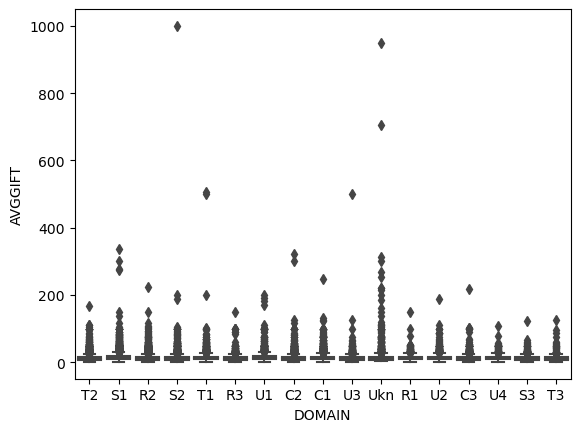

In [749]:
# Visually analyzing categorical data with Target variable
sns.boxplot(x="DOMAIN", y="AVGGIFT", data=data)
plt.show()

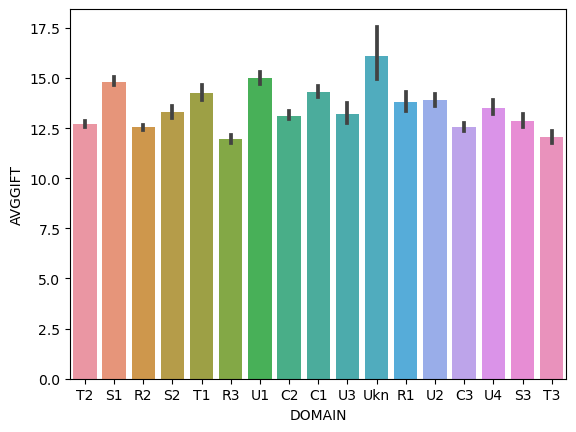

In [750]:
sns.barplot(x="DOMAIN", y="AVGGIFT", data=data)
plt.show()

## LESSON 2
### Cleaning column GENDER

In [751]:
data['GENDER'].value_counts()

F    48595
M    37066
      2789
U     1634
J      336
C        2
A        1
Name: GENDER, dtype: int64

In [752]:
'''def clean_gender_col(x):
    if x in ['',' ' ,'U', 'C', 'J', 'A']:
        return 'other'
    else:
        return x'''

"def clean_gender_col(x):\n    if x in ['',' ' ,'U', 'C', 'J', 'A']:\n        return 'other'\n    else:\n        return x"

In [753]:
#data['GENDER'] = list(map(clean_gender_col, data['GENDER']))

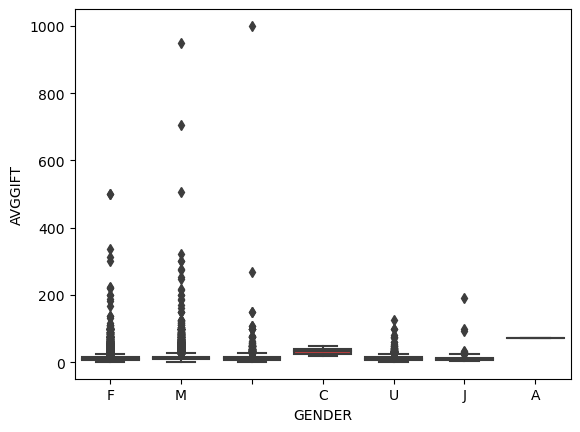

In [754]:
# Visually analyzing categorical data with Target variable
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

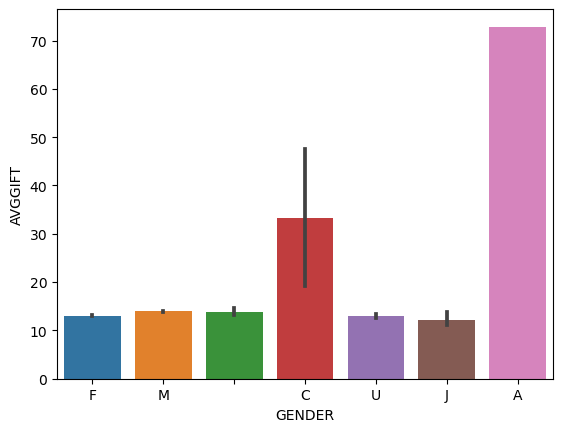

In [755]:
sns.barplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

In [756]:
#data = data.drop(columns=['GENDER'], axis=1)

In [757]:
#data['GENDER'] = list(map(clean_gender_col, data['GENDER']))

data['GENDER'] = data['GENDER'].apply(clean_gender_col)




In [758]:
data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'other')

In [759]:
#data = data.drop(columns=['GENDER'], axis=1)

## LESSON 3

### Dealing with a large number of categories
This code gives us the names of the states that should be put into category Other:

In [760]:
vals = pd.DataFrame(data['STATE'].value_counts())
vals = vals.reset_index()
vals.columns = ['state', 'counts']
vals

,state,counts
0,CA,16256
1,FL,7946
2,TX,7157
3,IL,6112
4,MI,5362
5,NC,3949
6,WA,3377
7,GA,3257
8,IN,2850
9,WI,2655


In [761]:
group_states_df = vals[vals['counts']<2500]
group_states = list(group_states_df['state'])
group_states

['TN',
 'AZ',
 'MN',
 'OR',
 'CO',
 'SC',
 'AL',
 'OK',
 'KY',
 'LA',
 'KS',
 'IA',
 'AR',
 'MS',
 'NV',
 'NM',
 'NE',
 'UT',
 'ID',
 'MT',
 'HI',
 'SD',
 'AK',
 'WY',
 'ND',
 'AP',
 'NY',
 'VA',
 'OH',
 'PA',
 'MD',
 'MA',
 'NJ',
 'CT',
 'AA',
 'AE',
 'ME',
 'NH',
 'RI',
 'VT',
 'VI',
 'WV',
 'GU',
 'DE',
 'AS',
 'DC']

In [762]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

In [763]:
data['STATE'] = list(map(clean_state, data['STATE']))

### Grouping data/bucketing data

In [764]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['IC2_'] = pd.cut(data['IC2'],4, labels=ic2_labels)
data # or: data['ic2_']

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_
0,IL,3712,XXXX,F,T2,3.878257,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low
1,CA,5202,XXXX,M,S1,6.000000,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High
2,NC,0,XXXX,M,R2,3.000000,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,F,R2,1.000000,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
4,FL,2001,XXXX,F,S2,3.000000,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90564,FL,4803,XXXX,F,S2,6.000000,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,L4D,24,1.098612,3.375000,Low
90565,other,0,XXXX,M,C2,3.878257,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,L1G,1,1.826874,25.000000,Moderate
90566,TX,5001,XXXX,M,C1,7.000000,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,L1F,1,1.826874,20.000000,High
90567,MI,3801,XXXX,M,C3,3.878257,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,L3E,7,1.098612,8.285714,Low


In [765]:
# There is also pd.qcut which is based on quantiles.

pd.cut(data['IC2'],4)     # to check the bins

0          (-1.5, 375.0]
1        (750.0, 1125.0]
2          (-1.5, 375.0]
3         (375.0, 750.0]
4          (-1.5, 375.0]
              ...       
90564      (-1.5, 375.0]
90565     (375.0, 750.0]
90566    (750.0, 1125.0]
90567      (-1.5, 375.0]
90568     (375.0, 750.0]
Name: IC2, Length: 90423, dtype: category
Categories (4, interval[float64, right]): [(-1.5, 375.0] < (375.0, 750.0] < (750.0, 1125.0] < (1125.0, 1500.0]]

In [766]:
data['MDMAUD'].value_counts()

XXXX    90147
C1CM       59
L1CM       44
I1CM       34
D2CM       27
C2CM       23
D1CM       18
L2CM       14
C1LM        8
L1LM        8
I2CM        7
D5CM        5
D5MM        4
I1LM        3
D5TM        3
C2MM        3
C5CM        3
D2MM        3
C2LM        2
C1MM        1
I2MM        1
I5CM        1
I5MM        1
C5MM        1
L1MM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [767]:
def clean_mdmaud(x):
    if x in 'XXXX':
        return x
    else:
        return 'other'

In [768]:
data['MDMAUD'] = list(map(clean_mdmaud, data['MDMAUD']))

In [769]:
data['MDMAUD'].value_counts()

XXXX     90147
other      276
Name: MDMAUD, dtype: int64

## LESSON 4
### Regular Expressions

In [770]:
import re

In [771]:
text = "That person wears marvelous trousers."

In [772]:
pattern = '[A-z]'
#pattern = 'That'
#pattern = '[That]'
#pattern = '[atsdhksdgs]'
re.findall(pattern, text)

['T',
 'h',
 'a',
 't',
 'p',
 'e',
 'r',
 's',
 'o',
 'n',
 'w',
 'e',
 'a',
 'r',
 's',
 'm',
 'a',
 'r',
 'v',
 'e',
 'l',
 'o',
 'u',
 's',
 't',
 'r',
 'o',
 'u',
 's',
 'e',
 'r',
 's']

In [773]:
text = "This is an A and B conversation, so C your way out of it."
pattern = '[^A-z]'
re.findall(pattern, text)

[' ', ' ', ' ', ' ', ' ', ' ', ',', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.']

### Quantifiers
- *: Matches previous character 0 or more times
- +: Matches previous character 1 or more times
- ?: Matches previous character 0 or 1 times (optional)
- {}: Matches previous characters however many times specified within:
- {n}: Exactly n times
- {n,}: At least n times
- {n,m}: Between n and m times

In [774]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = "c*t"
print(re.findall(pattern, text))

['t', 't', 't', 'ct', 't', 't', 't', 't', 'ct', 'ct']


In [775]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = 'c*a*t'
print(re.findall(pattern, text))

['t', 'caat', 't', 'ct', 't', 't', 't', 'cat', 'ct', 'ct']


In [776]:
text = "The complicit caaaat ct interacted with the other cats exactly as we expected."
pattern = "a+"
print(re.findall(pattern, text))
# Returns matches where the previous character appears 1 or more times

['aaaa', 'a', 'a', 'a', 'a']


In [777]:
text = "Is the correct spelling color or colour?"
pattern = "colou?r"
print(re.findall(pattern, text))

['color', 'colour']


In [778]:
text = "We can match the following: aaaawwww, aww, awww, awwww, awwwww"
pattern = "aw{3}"
print(re.findall(pattern, text))

['awww', 'awww', 'awww', 'awww']


In [779]:
pattern = "aw{1,}"
print(re.findall(pattern, text))

['awwww', 'aww', 'awww', 'awwww', 'awwwww']


In [780]:
text = "Let's see how we can match the following: aaw, aaww, aawww, awwww, awwwww"
pattern = "a{2,}w{2,}"
print(re.findall(pattern, text))

['aaww', 'aawww']


In [783]:
#Act. 4 Create a function to automate the process of reducing the number of values of a categorical column.

list_clean = ['M', 'F'] # se modifican los valores según lo que se quiere aceptados

def clean_cat(x, list_clean=[]):
    if x in list_clean:
        return x
    else:
        return 'other'


In [785]:
data['GENDER'] = data['GENDER'].apply(lambda x: clean_cat(x, list_clean))
data['GENDER'].value_counts()

F        48595
M        37066
other     4762
Name: GENDER, dtype: int64